In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [2]:
data = np.loadtxt("data.txt", delimiter=",")

In [3]:
x = data[:,0].reshape(-1,1)
y = data[:,1]

In [4]:
plt.rcParams['font.family'] = ['sans-serif']    #显示中文标签
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus']=False        #用来正常显示负号

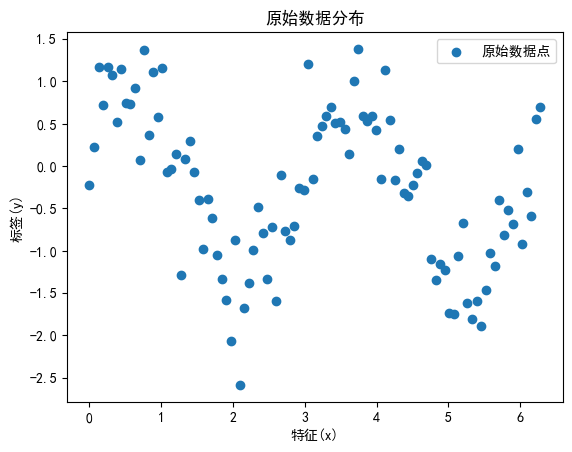

In [5]:
plt.scatter(x, y, label="原始数据点")
plt.title("原始数据分布")
plt.xlabel("特征(x)")
plt.ylabel("标签(y)")
plt.legend()
plt.show()

In [6]:
degree = 7

poly_features = PolynomialFeatures(degree=degree, include_bias=False)
x_poly = poly_features.fit_transform(x) 

In [7]:
model = LinearRegression()
model.fit(x_poly, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [8]:
y_pred = model.predict(x_poly)

In [9]:
mse = mean_squared_error(y, y_pred)
print(f"模型训练的均方误差为{mse:.4f}")

模型训练的均方误差为0.1974


In [10]:
X_test = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
X_test_poly = poly_features.transform(X_test)
y_test_pred = model.predict(X_test_poly)

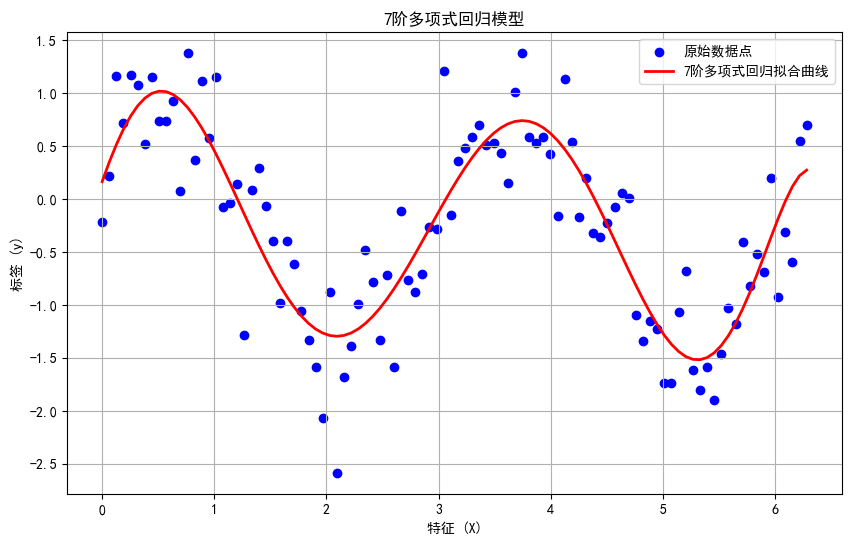

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='原始数据点')
plt.plot(X_test, y_test_pred, color='red', linewidth=2, label=f'{degree}阶多项式回归拟合曲线')
plt.title(f'{degree}阶多项式回归模型')
plt.xlabel('特征 (X)')
plt.ylabel('标签 (y)')
plt.legend()
plt.grid(True)
plt.show()